In [1]:
# import os
# from ECG.ecg import read_ecg
# from ECG.ecg_sig import band_pass_filter
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
# filer  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01r.dat")
# import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# import numpy as np
# from scipy.signal import find_peaks

# import tensorflow as tf
# from sklearn.model_selection import train_test_split



# events = 1000
# eventsr =4*events

# T = 1/100

# num_windows = 20000
# batchs = np.zeros((num_windows,events))
# labels = np.zeros(num_windows)
# y_full = read_ecg(file,0,num_windows*events)
# yr_full = read_ecg(filer,0,num_windows*eventsr)
# RespN_full = yr_full[2::4]

# for i in range(num_windows):
#     yf = band_pass_filter(y_full[i*events:(i+1)*events],low=0.1,high = 0.5)
#     RespNf = band_pass_filter(RespN_full[i*events:(i+1)*events],low=0.1,high = 0.5)
#     batchs[i] = yf
#     idx ,_ = find_peaks(RespNf,height=0)
#     labels[i] = len(idx)*60/(events/100)

# print(batchs.shape)
# print(type(batchs))
# print(labels)
# labels = labels.reshape((-1,1))
# X = batchs.reshape((num_windows,events))
# y = labels
# import tensorflow as tf

# x_train, x_test,y_train, y_test = train_test_split(X,y,test_size=0.33)
# x_train, x_test = x_train / np.max(x_train), x_test / np.max(x_train)

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(100, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(50, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(1, activation='relu')
# ])

# model.compile(optimizer='adam',
#               loss='mse')

In [2]:
import os
from ECG.ecg import read_ecg
from ECG.ecg_sig import band_pass_filter
from ECG.ecg import make_df_summary
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
# filer  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01r.dat")

file  =  "a01.dat"
filer  =  "a01r.dat"

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [3]:
events = 1000
eventsr =4*events
num_windows = 200

num_windows = 200
batchs = np.zeros((num_windows,events))
labels = np.zeros(num_windows)
y_full = read_ecg(file,0,num_windows*events)
yr_full = read_ecg(filer,0,num_windows*eventsr)
RespN_full = yr_full[2::4]



In [5]:
for i in range(num_windows):
    yf = band_pass_filter(y_full[i*events:(i+1)*events],low=0.1,high = 0.5)
    RespNf = band_pass_filter(RespN_full[i*events:(i+1)*events],low=0.1,high = 0.5)
    batchs[i] = yf
    idx ,_ = find_peaks(RespNf,height=0)
    
    labels[i] = len(idx)*60/(events/100)

(0, 10)

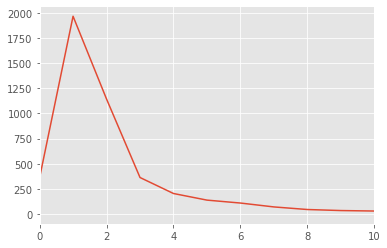

In [6]:
plt.plot(np.abs(np.fft.fft(batchs[0])))
plt.xlim(0,10)

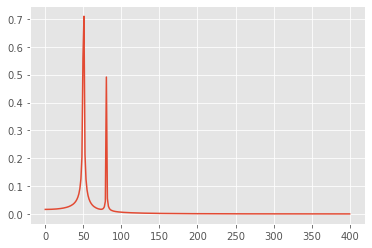

In [26]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

0.20040080160320642


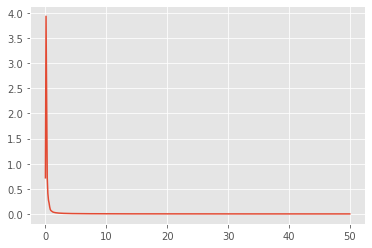

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 1000
# sample spacing
T = 1.0 / 100.0
x = np.linspace(0.0, N*T, N)
y = batchs[0]
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
print(xf[np.argmax(yf[:100])])
plt.show()

In [44]:
df = make_df_summary(file,0,num_windows*events)

In [47]:
df["cs"] = np.cumsum(df.Offset)

In [49]:
df["csm"] = np.cumsum(df.Offset)

In [67]:
np.digitize(df.Offset,np.arange(0,df.Offset.values[-1],1000))

2284

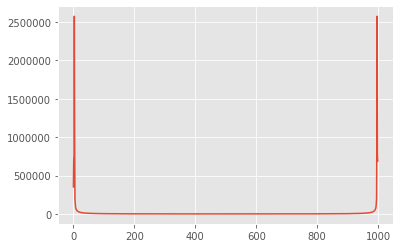

In [15]:
plt.plot(np.abs(np.fft.fft(RespNf)))

In [8]:
rf = np.abs(np.fft.fft(RespNf))
print(xf[np.argmax(rf[:100])])

0.30060120240480964
